# Contents

----

----

__This notebook investigates the dataset derived from `Ming et al.` (race-cancer correlation 0.025). Inductive Conformal Predictors are applied to underlying classifiers: `ADA`, `RF`, `LR`, and `KNN`.__

----

In [1]:
import os

# set pwd to root of repository
repo_root = 'C:/Users/Bob/CHPC/conformal_prediction/vigilant-computing-machine/'
#repo_root = '/uufs/chpc.utah.edu/common/home/u0740821/conformal_prediction/vigilant-computing-machine'

os.chdir(repo_root)

In [2]:
# 'vigilant-computing-machine/source/util.py'
import source.util as util

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

import Orange
from Orange.distance import Euclidean
import orangecontrib.conformal as cp

# only works when running top-to-bottom 
# (do at top of cell containing experiment, if not running all cells)
#
# set NumPy seed for Orange3-Conformal reproducibility
np.random.seed(42)

# read in data

In [3]:
tab_signal = util.read_csv_to_table('./data/signal_with_header_for_orange.csv')

----

In [8]:
def run_experiments(cp_in, train, test, calib, eps=0.1, times=1, rseed=None, method=''):
    from copy import deepcopy
    
    if rseed is not None:
        np.random.seed(rseed)
    preds_dfs = []
    for run in range(times):
        cc = deepcopy(cp_in)
        cc.fit(train, calibrate)
        preds = []
        verds = []
        for ex in test:
            pred = cc.predict(ex, eps)
            verds.append(pred.verdict(ex.get_class().value, eps))
            preds.append(pred)
        preds_df = util.preds_to_df(preds)
        preds_df['verdict'] = verds
        util.add_inst_to_pred_df(preds_df, test)
        preds_dfs.append(
            util.df_pred_inst_metrics(preds_df, 
                                      dataset_name=test.name,
                                      mondrian=cc.mondrian,
                                      method=method, model_for_setup=cc))
    return pd.concat(preds_dfs, axis=1).T


def plot_experiments(df_experiments, data_title=None, scale=True):
    import matplotlib.pyplot as plt
    
    is_mondrian = (lambda x: ' (Mondrian)' if x else '')
    fig, ax = plt.subplots()

    for i, run in df_experiments.iterrows():    
        util.plot_conf_cred(run.df, 
                            title=f'{run.classifier}{is_mondrian(run.mondrian)}\ndata": {run.data if data_title is None else data_title}', 
                            ax=ax,
                            scale=scale,
                            alpha=0.5)
        ax.hlines(y=run.verdict, 
                        xmin=0, 
                        xmax=len(run.df), 
                        label=f'acc {run.verdict*100:.2f}%', 
                        color='g', 
                        linestyles='--')
        ax.vlines(x=len(run.df)/4, ymin=0, ymax=1, color='k', lw=3, linestyles=(0, (1, 10)))
        ax.vlines(x=len(run.df)/2, ymin=0, ymax=1, color='k', lw=3, linestyles=(0, (1, 10)))
        ax.vlines(x=len(run.df)*3/4, ymin=0, ymax=1, color='k', lw=3, linestyles=(0, (1, 10)))
        ax.legend()

        
def get_low_confidence_predictions(df, min_conf=0.95):
    return df[df['confidence'] < min_conf]


def get_incorrect_predictions(df):
    return df[~df['verdict']]

Was looking into ICP for each feature and prediction by vote compared to ICP for all when all's verdict == False

Conclusion: 

feature selection and/or dimensionality reduction should be performed rather than blindly using all features with equal weight

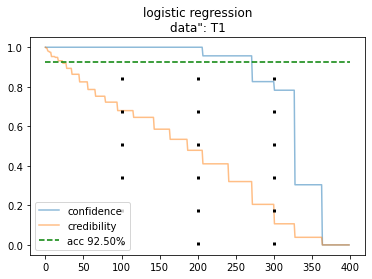

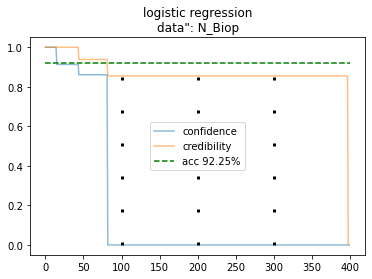

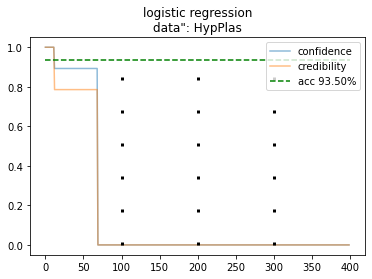

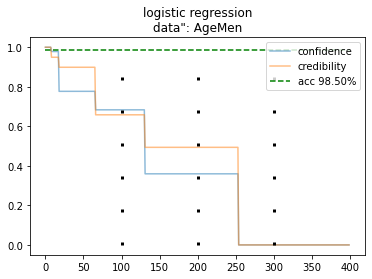

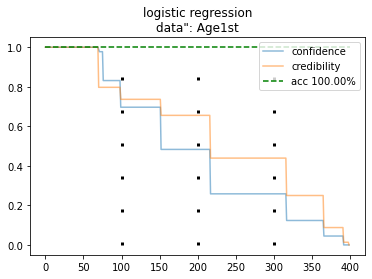

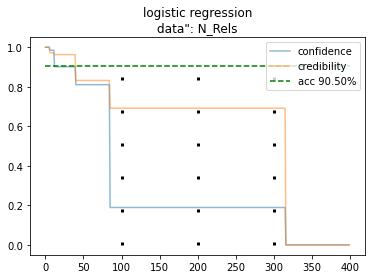

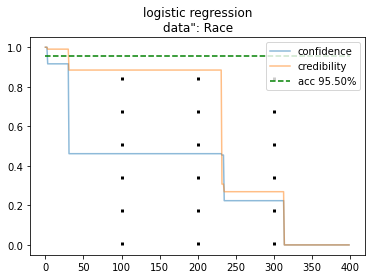

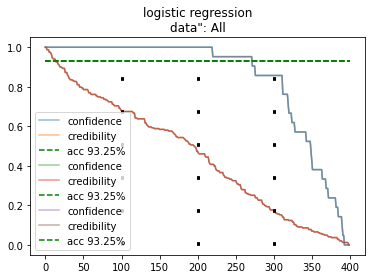

In [54]:
np.random.seed(42)


cc=cp.classification.InductiveClassifier(
    cp.nonconformity.InverseProbability(
        Orange.classification.LogisticRegressionLearner()))

tab_sT1 = tab_signal[:,[0,7]]
tab_sN_Biop = tab_signal[:,[1,7]]
tab_sHypPlas = tab_signal[:,[2,7]]
tab_sAgeMen = tab_signal[:,[3,7]]
tab_sAge1st = tab_signal[:,[4,7]]
tab_sN_Rels = tab_signal[:,[5,7]]
tab_sRace = tab_signal[:,[6,7]]

tab = tab_sT1
train, test, calibrate = util.train_test_calibrate_split(tab) # RS(2,1) -> RS(2,1)
t1 = run_experiments(cc, train, test, calibrate, times=1)

tab = tab_sN_Biop
train, test, calibrate = util.train_test_calibrate_split(tab) # RS(2,1) -> RS(2,1)
nb = run_experiments(cc, train, test, calibrate, times=1)

tab = tab_sHypPlas
train, test, calibrate = util.train_test_calibrate_split(tab) # RS(2,1) -> RS(2,1)
hp = run_experiments(cc, train, test, calibrate, times=1)

tab = tab_sAgeMen
train, test, calibrate = util.train_test_calibrate_split(tab) # RS(2,1) -> RS(2,1)
am = run_experiments(cc, train, test, calibrate, times=1)

tab = tab_sAge1st
train, test, calibrate = util.train_test_calibrate_split(tab) # RS(2,1) -> RS(2,1)
af = run_experiments(cc, train, test, calibrate, times=1)

tab = tab_sN_Rels
train, test, calibrate = util.train_test_calibrate_split(tab) # RS(2,1) -> RS(2,1)
nr = run_experiments(cc, train, test, calibrate, times=1)

tab = tab_sRace
train, test, calibrate = util.train_test_calibrate_split(tab) # RS(2,1) -> RS(2,1)
r = run_experiments(cc, train, test, calibrate, times=1)


plot_experiments(t1, data_title='T1')
plot_experiments(nb, data_title='N_Biop')
plot_experiments(hp, data_title='HypPlas')
plot_experiments(am, data_title='AgeMen')
plot_experiments(af, data_title='Age1st')
plot_experiments(nr, data_title='N_Rels')
plot_experiments(r, data_title='Race')
plot_experiments(tt, data_title='All')

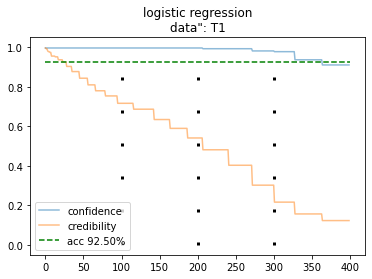

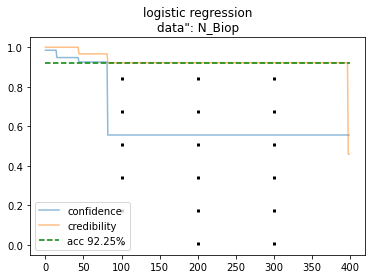

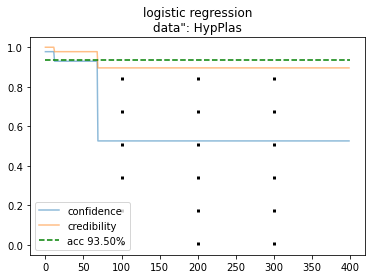

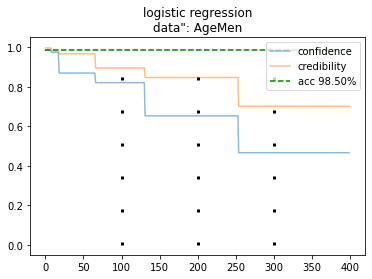

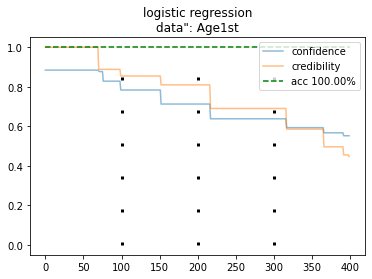

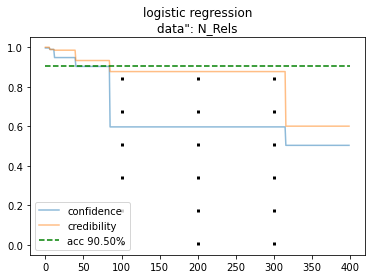

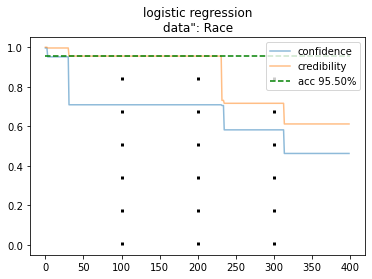

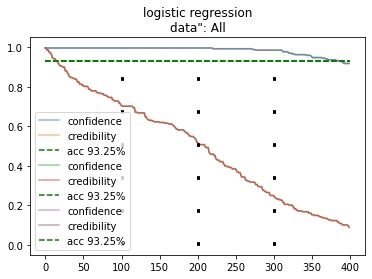

In [53]:
plot_experiments(t1, data_title='T1', scale=False)
plot_experiments(nb, data_title='N_Biop', scale=False)
plot_experiments(hp, data_title='HypPlas', scale=False)
plot_experiments(am, data_title='AgeMen', scale=False)
plot_experiments(af, data_title='Age1st', scale=False)
plot_experiments(nr, data_title='N_Rels', scale=False)
plot_experiments(r, data_title='Race', scale=False)
plot_experiments(tt, data_title='All', scale=False)

In [86]:
t1.loc[0, 'df']

,classes,confidence,credibility,eps,p,verdict,T1,class
0,[1],0.992537,0.402985,0.1,"[(0.007462686567164179, 0), (0.402985074626865...",True,0.558824,1
1,[0],0.996269,0.589552,0.1,"[(0.5895522388059702, 0), (0.00373134328358208...",True,0.382353,0
2,[0],0.936567,0.156716,0.1,"[(0.15671641791044777, 0), (0.0634328358208955...",True,0.470588,0
3,[1],0.992537,0.402985,0.1,"[(0.007462686567164179, 0), (0.402985074626865...",True,0.558824,1
4,[1],0.977612,0.216418,0.1,"[(0.022388059701492536, 0), (0.216417910447761...",True,0.529412,1
...,...,...,...,...,...,...,...,...
395,[1],0.992537,0.402985,0.1,"[(0.007462686567164179, 0), (0.402985074626865...",True,0.558824,1
396,[1],0.910448,0.123134,0.1,"[(0.08955223880597014, 0), (0.1231343283582089...",False,0.500000,0
397,[0],0.936567,0.156716,0.1,"[(0.15671641791044777, 0), (0.0634328358208955...",True,0.470588,0
398,[1],0.996269,0.541045,0.1,"[(0.0037313432835820895, 0), (0.54104477611940...",True,0.588235,1


In [205]:
agg_conf = \
t1.loc[0, 'df'].confidence + \
nb.loc[0, 'df'].confidence + \
hp.loc[0, 'df'].confidence + \
am.loc[0, 'df'].confidence + \
af.loc[0, 'df'].confidence + \
nr.loc[0, 'df'].confidence + \
r.loc[0, 'df'].confidence
agg_conf=agg_conf / 7
agg_conf

0      0.762793
1      0.623134
2      0.600746
3      0.763859
4      0.642324
         ...   
395    0.654051
396    0.692431
397    0.730810
398    0.719616
399    0.772921
Name: confidence, Length: 400, dtype: float64

In [206]:
agg_cred = \
t1.loc[0, 'df'].credibility + \
nb.loc[0, 'df'].credibility + \
hp.loc[0, 'df'].credibility + \
am.loc[0, 'df'].credibility + \
af.loc[0, 'df'].credibility + \
nr.loc[0, 'df'].credibility + \
r.loc[0, 'df'].credibility
agg_cred=agg_cred / 7
agg_cred

0      0.796908
1      0.770256
2      0.647122
3      0.783582
4      0.721748
         ...   
395    0.754264
396    0.761194
397    0.763859
398    0.832623
399    0.853412
Name: credibility, Length: 400, dtype: float64

In [169]:
agg_classes = \
t1.loc[0, 'df'].classes.apply(lambda x: [int(val) for val in x]) + \
nb.loc[0, 'df'].classes.apply(lambda x: [int(val) for val in x]) + \
hp.loc[0, 'df'].classes.apply(lambda x: [int(val) for val in x]) + \
am.loc[0, 'df'].classes.apply(lambda x: [int(val) for val in x]) + \
af.loc[0, 'df'].classes.apply(lambda x: [int(val) for val in x]) + \
nr.loc[0, 'df'].classes.apply(lambda x: [int(val) for val in x]) + \
r.loc[0, 'df'].classes.apply(lambda x: [int(val) for val in x])

In [182]:
df=pd.DataFrame(agg_classes).classes
df

0            [1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1]
1      [0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]
2      [0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]
3            [1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1]
4      [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]
                        ...                   
395    [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]
396       [1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]
397       [0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1]
398       [1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1]
399          [0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1]
Name: classes, Length: 400, dtype: object

In [183]:
df_cc=pd.DataFrame({'class_0': df.apply(lambda x: x.count(0)), 'class_1': df.apply(lambda x: x.count(1))})
df_cc

,class_0,class_1
0,4,7
1,7,6
2,7,6
3,4,7
4,6,7
...,...,...
395,6,7
396,5,7
397,6,6
398,5,7


In [208]:
df_cc=df_cc.join([agg_conf,agg_cred])
df_cc

,class_0,class_1,confidence,credibility
0,4,7,0.762793,0.796908
1,7,6,0.623134,0.770256
2,7,6,0.600746,0.647122
3,4,7,0.763859,0.783582
4,6,7,0.642324,0.721748
...,...,...,...,...
395,6,7,0.654051,0.754264
396,5,7,0.692431,0.761194
397,6,6,0.730810,0.763859
398,5,7,0.719616,0.832623


In [209]:
df=tt.loc[0, 'df'].loc[:,['classes','confidence','credibility','verdict','Race','class']]
df

,classes,confidence,credibility,verdict,Race,class
0,[1],0.985075,0.294776,True,0,1
1,[0],0.996269,0.626866,True,1,0
2,[1],0.985075,0.250000,False,0,0
3,[1],0.996269,0.507463,True,0,1
4,[1],0.992537,0.343284,True,0,1
...,...,...,...,...,...,...
395,[1],0.996269,0.779851,True,0,1
396,[0],0.936567,0.126866,True,0,0
397,[0],0.962687,0.182836,True,0,0
398,[1],0.992537,0.399254,True,0,1


In [241]:
df=df.join(df_cc, rsuffix='_ensemble')
df[~df.verdict].head()

,classes,confidence,credibility,verdict,Race,class,class_0,class_1,confidence_ensemble,credibility_ensemble
2,[1],0.985075,0.250000,False,0,0,7,6,0.600746,0.647122
15,[0],0.962687,0.171642,False,0,1,6,7,0.659915,0.711087
33,[0],0.962687,0.171642,False,0,1,6,7,0.641258,0.732942
39,[1],0.958955,0.160448,False,1,0,7,6,0.646055,0.723881
82,[],0.917910,0.089552,False,3,0,6,7,0.696695,0.775586


Both non/parametric DR perform poorly per Categorical/Discrete variables were scaled

Tried using OneHotEncoder, but wants DataFrame and would rather look at Orange means to do this per have Table

Try PCA, but possibly not linear--may end up TSNE/UMAP

In [301]:
# imports and setup 

# import numpy as np

# import pandas as pd
# pd.set_option('display.notebook_repr_html', False)

from sklearn.decomposition import PCA 
from sklearn.manifold import TSNE
from sklearn.preprocessing import scale
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import homogeneity_score, v_measure_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_selection import mutual_info_classif
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn import svm, metrics
# from sklearn.ensemble import RandomForestClassifier

# from imblearn.over_sampling import SMOTE

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('ggplot')

import seaborn as sns

import plotly.express as px

In [413]:
X=scale(tab_signal.X)

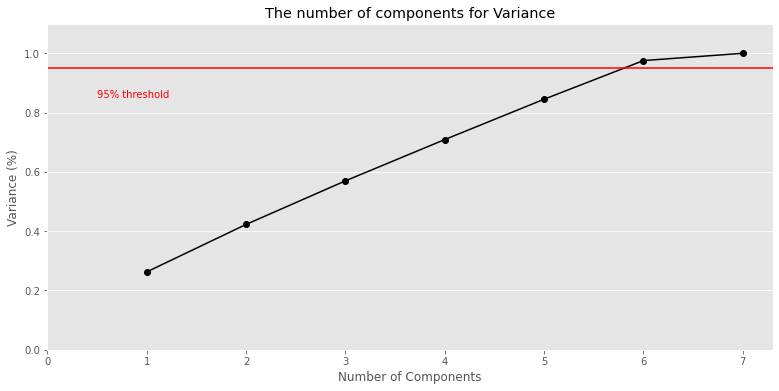

In [375]:
m=X.shape[1]
pca_2_plot = PCA().fit(X)
plt.rcParams["figure.figsize"] = (13,6)
fig, ax = plt.subplots() 
plt.ylim(0.0,1.1)
plt.plot(np.arange(1, m+1, step=1), np.cumsum(pca_2_plot.explained_variance_ratio_), marker='o', linestyle='-', color='black')
plt.xlabel('Number of Components')
plt.xticks(np.arange(0, m+1, step=1)) #change to 1 based
plt.ylabel('Variance (%)')
plt.title('The number of components for Variance')
plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% threshold', color = 'red', fontsize=10)
ax.grid(axis='x')
plt.show()

,confidence,credibility,verdict,empty,single,single_correct,multiple,data,mondrian,classifier,conformal_predictor,nonconformity,method,model,instance_of_model,df
0,0.879561,0.646264,0.904315,0.0,0.512195,0.41651,0.487805,untitled,False,logistic regression,InductiveClassifier (InverseProbability (logis...,InverseProbability (logistic regression),,LogisticRegressionClassifier(skl_model=Logisti...,InductiveClassifier (InverseProbability (logis...,classes confidence credibility eps \ 0...
1,0.879561,0.646264,0.904315,0.0,0.512195,0.41651,0.487805,untitled,False,logistic regression,InductiveClassifier (InverseProbability (logis...,InverseProbability (logistic regression),,LogisticRegressionClassifier(skl_model=Logisti...,InductiveClassifier (InverseProbability (logis...,classes confidence credibility eps \ 0...
2,0.879561,0.646264,0.904315,0.0,0.512195,0.41651,0.487805,untitled,False,logistic regression,InductiveClassifier (InverseProbability (logis...,InverseProbability (logistic regression),,LogisticRegressionClassifier(skl_model=Logisti...,InductiveClassifier (InverseProbability (logis...,classes confidence credibility eps \ 0...


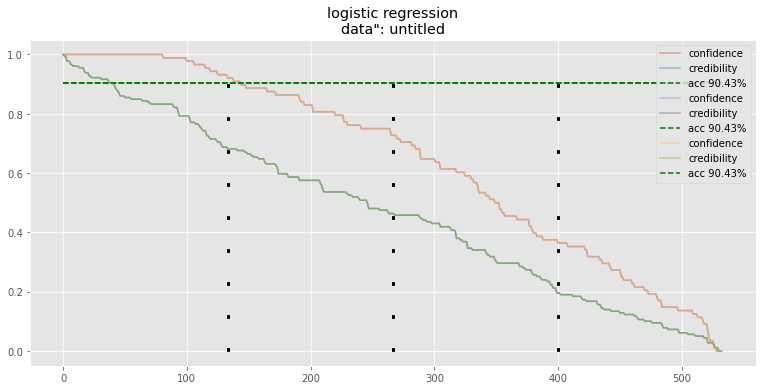

In [376]:
np.random.seed(42)

# make PCA3 Table
dom=Orange.data.Domain(attributes=(Orange.data.ContinuousVariable('PC1'),
                                   Orange.data.ContinuousVariable('PC2'),
                                   Orange.data.ContinuousVariable('PC3')),
                       class_vars=Orange.data.DiscreteVariable('Case_signalYN', values=('0','1')))
tab_pca3 = Orange.data.Table.from_numpy(domain=dom, 
                                        X=PCA(n_components=3).fit_transform(X),
                                        Y=tab_signal.Y)
# split
test, train, calibrate = util.train_test_calibrate_split(tab_pca3)

## Logistic
cc=cp.classification.InductiveClassifier(
    cp.nonconformity.InverseProbability(
        Orange.classification.LogisticRegressionLearner()))
pred_pca3 = run_experiments(cc, train, test, calibrate, times=3)

plot_experiments(pred_pca3)
pred_pca3

C:\Users\Bob\anaconda3\envs\orange38R\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

C:\Users\Bob\anaconda3\envs\orange38R\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



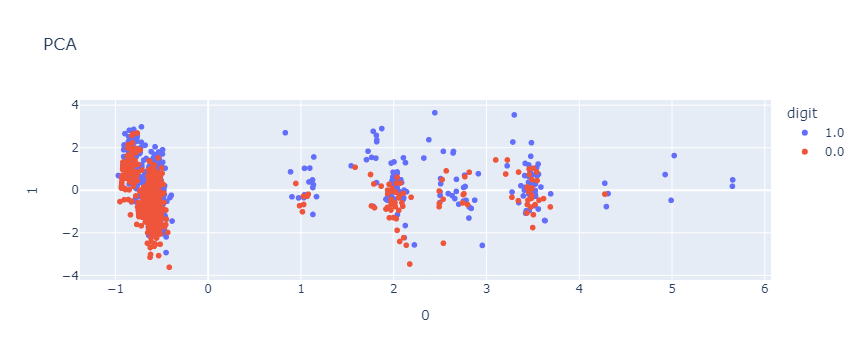

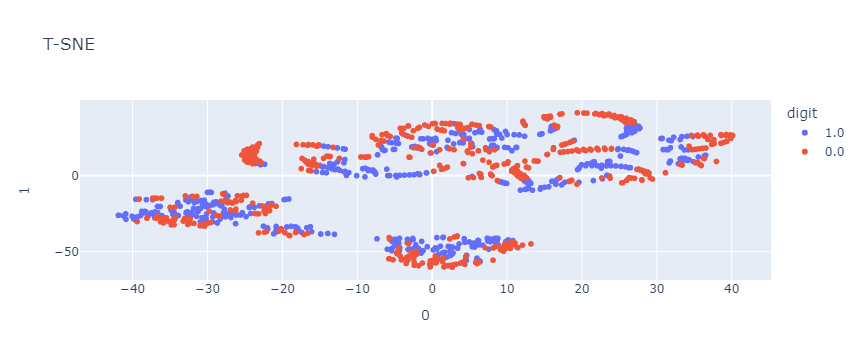

In [377]:
import plotly.express as px
# from umap import UMAP
from sklearn.manifold import TSNE

# PCA:
pca_model = PCA()
X_PCA = pca_model.fit_transform(X)

# T-SNE:
tsne = TSNE(n_components=2, random_state=0)
X_TSNE = tsne.fit_transform(X)

# Plot and compare PCA, T-SNE:

fig = px.scatter(
    X_PCA, x=0, y=1,
    color=tab_signal.Y.astype(str), labels={'color': 'digit'}, title='PCA'
)
fig.show()

fig = px.scatter(
    X_TSNE, x=0, y=1,
    color=tab_signal.Y.astype(str), labels={'color': 'digit'}, title='T-SNE'
)
fig.show()

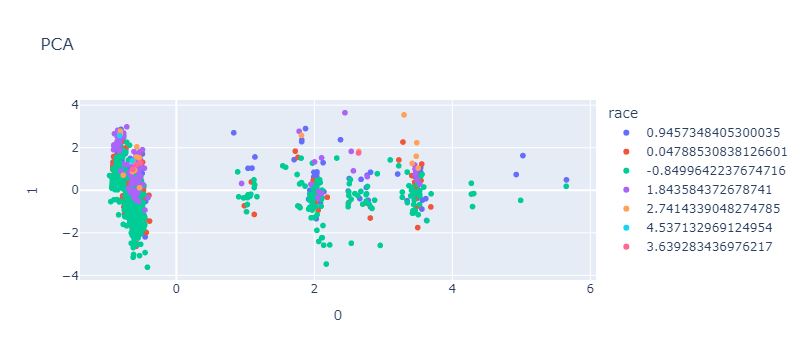

In [384]:
fig = px.scatter(
    X_PCA, x=0, y=1,
    color=X[:,-1].astype(str), labels={'color': 'race'}, title='PCA'
)
fig.show()

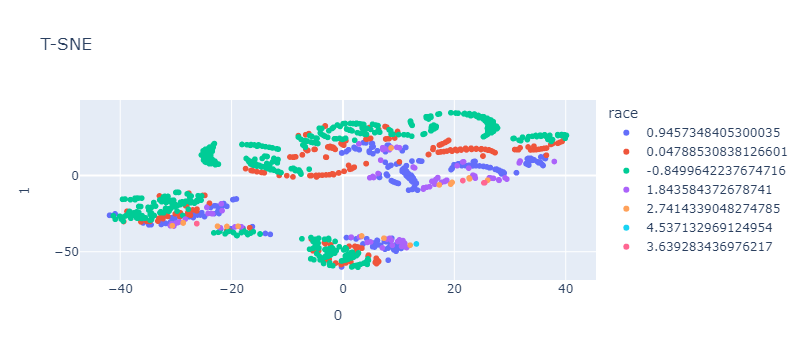

In [379]:
fig = px.scatter(
    X_TSNE, x=0, y=1,
    color=X[:,-1].astype(str), labels={'color': 'race'}, title='T-SNE'
)
fig.show()

In [380]:
cmap_bold = ListedColormap(['#00FF00', '#FF0000'], [0, 1])
le = LabelEncoder().fit(['Healthy','Cancer'])
#
# 3D scatter plot of 3D t-SNE (100% vs 10% alpha)
#
def Plot3DtSNE_df(ttle='title', df1=None, azm=-60, elv=30):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(df1['tsne-3d-1'], 
               df1['tsne-3d-2'],
               zs=df1['tsne-3d-3'], 
               c=df1['y_num'], 
               cmap=cmap_bold,
               label=le.inverse_transform,
               s=1
              )
    plt.title(ttle)
    plt.legend(le.classes_) # TODO
    ax.set_xlabel('Dimension 1')
    ax.set_ylabel('Dimension 2')
    ax.set_zlabel('Dimension 3')
    ax.azim = azm
    ax.elev = elv
    return ax

In [381]:
import plotly.express as px
# from umap import UMAP
from sklearn.manifold import TSNE

# PCA:
pca_model = PCA()
X_PCA = pca_model.fit_transform(X)

# T-SNE:
tsne = TSNE(n_components=3, random_state=0)
tsne_3d = tsne.fit_transform(X)

C:\Users\Bob\anaconda3\envs\orange38R\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

C:\Users\Bob\anaconda3\envs\orange38R\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



<Axes3DSubplot:title={'center':'title'}, xlabel='Dimension 1', ylabel='Dimension 2'>

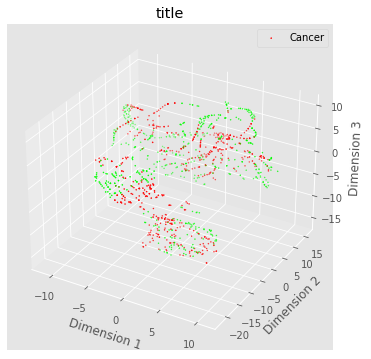

In [382]:
df_tsne_3d = pd.DataFrame()
df_tsne_3d['tsne-3d-1'] = tsne_3d[:,0]
df_tsne_3d['tsne-3d-2'] = tsne_3d[:,1]
df_tsne_3d['tsne-3d-3'] = tsne_3d[:,2]
df_tsne_3d['y_num'] = tab_signal.Y.astype(int)
Plot3DtSNE_df(df1=df_tsne_3d)

Try CP from TSNE

C:\Users\Bob\anaconda3\envs\orange38R\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

C:\Users\Bob\anaconda3\envs\orange38R\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



,confidence,credibility,verdict,empty,single,single_correct,multiple,data,mondrian,classifier,conformal_predictor,nonconformity,method,model,instance_of_model,df
0,0.798311,0.755215,0.87242,0.0,0.302064,0.174484,0.697936,untitled,False,logistic regression,InductiveClassifier (InverseProbability (logis...,InverseProbability (logistic regression),,LogisticRegressionClassifier(skl_model=Logisti...,InductiveClassifier (InverseProbability (logis...,classes confidence credibility eps \ 0...
1,0.798311,0.755215,0.87242,0.0,0.302064,0.174484,0.697936,untitled,False,logistic regression,InductiveClassifier (InverseProbability (logis...,InverseProbability (logistic regression),,LogisticRegressionClassifier(skl_model=Logisti...,InductiveClassifier (InverseProbability (logis...,classes confidence credibility eps \ 0...
2,0.798311,0.755215,0.87242,0.0,0.302064,0.174484,0.697936,untitled,False,logistic regression,InductiveClassifier (InverseProbability (logis...,InverseProbability (logistic regression),,LogisticRegressionClassifier(skl_model=Logisti...,InductiveClassifier (InverseProbability (logis...,classes confidence credibility eps \ 0...


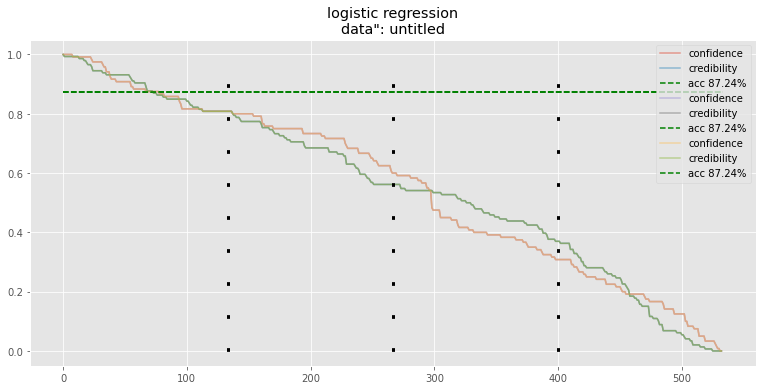

In [383]:
np.random.seed(42)

# make TNSE_3d Table
dom=Orange.data.Domain(attributes=(Orange.data.ContinuousVariable('D1'),
                                   Orange.data.ContinuousVariable('D2'),
                                   Orange.data.ContinuousVariable('D3')),
                       class_vars=Orange.data.DiscreteVariable('Case_signalYN', values=('0','1')))
tab_tnse3 = Orange.data.Table.from_numpy(domain=dom, 
                                        X=TSNE(n_components=3, random_state=0).fit_transform(X),
                                        Y=tab_signal.Y)
# split
test, train, calibrate = util.train_test_calibrate_split(tab_tnse3)

## Logistic
cc=cp.classification.InductiveClassifier(
    cp.nonconformity.InverseProbability(
        Orange.classification.LogisticRegressionLearner()))
pred_tsne3 = run_experiments(cc, train, test, calibrate, times=3)

plot_experiments(pred_tsne3)
pred_tsne3

Dimension Reduced data doesn't seem to be performing well, but this is likely because categorical variables were scaled

One-Hot Encode categorical variables

,confidence,credibility,verdict,empty,single,single_correct,multiple,data,mondrian,classifier,conformal_predictor,nonconformity,method,model,instance_of_model,df
0,0.984347,0.497817,0.9325,0.005,0.995,0.9325,0.0,signal_with_header_for_orange,False,logistic regression,InductiveClassifier (InverseProbability (logis...,InverseProbability (logistic regression),,LogisticRegressionClassifier(skl_model=Logisti...,InductiveClassifier (InverseProbability (logis...,classes confidence credibility eps \ 0...
1,0.984347,0.497817,0.9325,0.005,0.995,0.9325,0.0,signal_with_header_for_orange,False,logistic regression,InductiveClassifier (InverseProbability (logis...,InverseProbability (logistic regression),,LogisticRegressionClassifier(skl_model=Logisti...,InductiveClassifier (InverseProbability (logis...,classes confidence credibility eps \ 0...
2,0.984347,0.497817,0.9325,0.005,0.995,0.9325,0.0,signal_with_header_for_orange,False,logistic regression,InductiveClassifier (InverseProbability (logis...,InverseProbability (logistic regression),,LogisticRegressionClassifier(skl_model=Logisti...,InductiveClassifier (InverseProbability (logis...,classes confidence credibility eps \ 0...


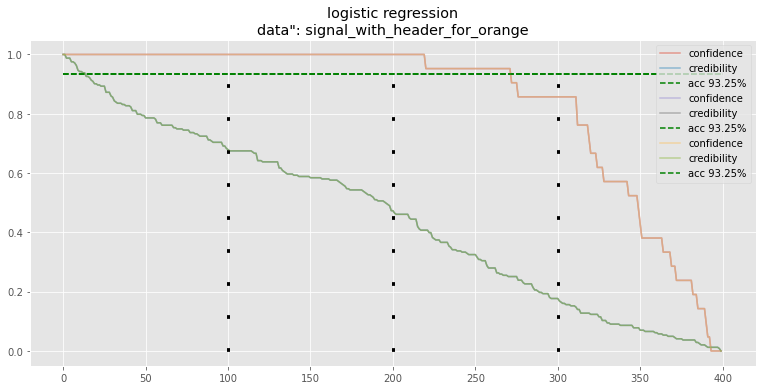

In [415]:
np.random.seed(42)


train, test = next(cp.evaluation.RandomSampler(tab_signal,2,1))
train, calibrate = next(cp.evaluation.RandomSampler(train,2,1))

cc=cp.classification.InductiveClassifier(
    cp.nonconformity.InverseProbability(
        Orange.classification.LogisticRegressionLearner()))
tt = run_experiments(cc, train, test, calibrate, times=3)

plot_experiments(tt)
tt

In [416]:
pred = df[~df.verdict].sort_values(by=['confidence','credibility']).iloc[2,:]
pred

classes                      [1]
confidence              0.921642
credibility             0.100746
verdict                    False
Race                           2
class                          0
class_0                        7
class_1                        6
confidence_ensemble     0.617804
credibility_ensemble    0.662047
Name: 191, dtype: object

In [16]:
import plotly.graph_objects as go

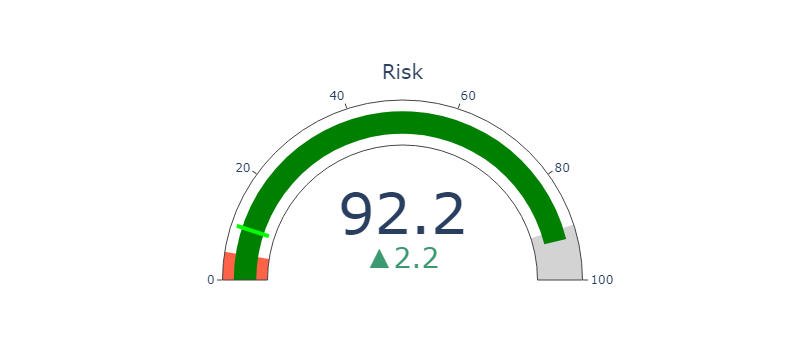

In [454]:
min_cred = 5
min_conf = 90
conf = pred.confidence*100
cred = pred.credibility*100
second_most_cred = (1 - pred.credibility) * 100
cred_threshold_clr = 'red' if cred < min_cred else 'lime'
conf_color = 'red' if conf < min_conf else 'green'

fig =go.Figure(go.Indicator(
    domain={'x': [0, 1], 'y': [0, 1]},
    value=conf,
    mode='gauge+number+delta',
    title={'text':'Risk'},
    delta={'reference':second_most_cred},
    gauge={'axis': {'range': [None,100]},
           'steps': [
               {'range': [0,min_cred], 'color': 'tomato'},
               {'range': [min_conf,100], 'color': 'lightgray'}],
           'threshold': {'line': {'color': cred_threshold_clr, 'width': 4}, 'thickness': 0.75, 'value': cred}}))
fig.show()

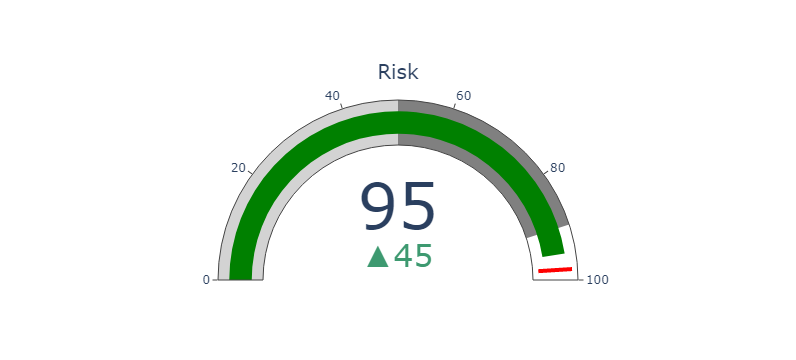

In [418]:
# def plot_low_confidence:
    #todo
    
# def plot_pred(pred):
    #todo

fig =go.Figure(go.Indicator(
    domain={'x': [0, 1], 'y': [0, 1]},
    value=95,
    mode='gauge+number+delta',
    title={'text':'Risk'},
    delta={'reference':50},
    gauge={'axis': {'range': [None,100]},
           'steps': [
               {'range': [0,50], 'color': 'lightGray'},
               {'range': [50,90], 'color': 'gray'}],
           'threshold': {'line': {'color': 'red', 'width': 4}, 'thickness': 0.75, 'value': 98}}))
fig.show()

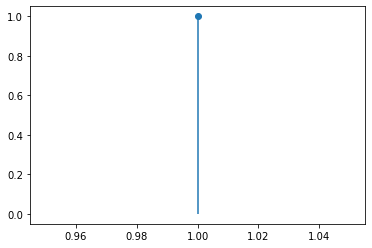

In [171]:
fig,ax = plt.subplots()
plt.stem(1,1)
plt.stem?

,classes,confidence,credibility,eps,p,verdict,T1,N_Biop,HypPlas,AgeMen,Age1st,N_Rels,Race,class
82,[],0.917910,0.089552,0.1,"[(0.08208955223880597, 0), (0.0895522388059701...",False,0.500000,0,2,0.285714,0.038462,2,3,0
116,[],0.917910,0.097015,0.1,"[(0.09701492537313433, 0), (0.0820895522388059...",False,0.500000,0,2,0.571429,1.000000,0,0,1
191,[1],0.921642,0.100746,0.1,"[(0.07835820895522388, 0), (0.1007462686567164...",False,0.470588,0,2,0.714286,0.051282,1,2,0
85,[1],0.929104,0.108209,0.1,"[(0.0708955223880597, 0), (0.10820895522388059...",False,0.411765,2,0,0.571429,0.089744,0,0,0
287,[1],0.929104,0.108209,0.1,"[(0.0708955223880597, 0), (0.10820895522388059...",False,0.441176,1,1,0.142857,0.064103,0,3,0


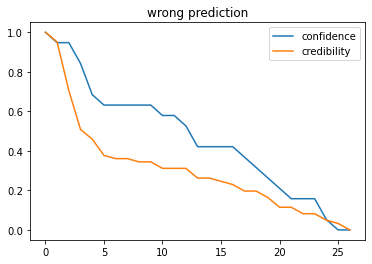

In [164]:
df=tt.loc[0, 'df']
util.plot_conf_cred(df[~df.verdict].sort_values(by=['confidence','credibility']), title='wrong prediction')
df[~df.verdict].sort_values(by=['confidence','credibility']).head()
# df[~df.verdict].sort_values(by=['confidence','credibility'])

,classes,confidence,credibility,eps,p,verdict,T1,N_Biop,HypPlas,AgeMen,Age1st,N_Rels,Race,class
82,[],0.91791,0.089552,0.1,"[(0.08208955223880597, 0), (0.0895522388059701...",False,0.500000,0,2,0.285714,0.038462,2,3,0
116,[],0.91791,0.097015,0.1,"[(0.09701492537313433, 0), (0.0820895522388059...",False,0.500000,0,2,0.571429,1.000000,0,0,1
94,[0],0.91791,0.100746,0.1,"[(0.10074626865671642, 0), (0.0820895522388059...",True,0.470588,0,2,0.571429,1.000000,0,2,0
134,[1],0.91791,0.100746,0.1,"[(0.08208955223880597, 0), (0.1007462686567164...",True,0.529412,0,2,0.285714,1.000000,0,1,1
286,[0],0.91791,0.100746,0.1,"[(0.10074626865671642, 0), (0.0820895522388059...",True,0.470588,0,2,0.571429,0.051282,1,2,0


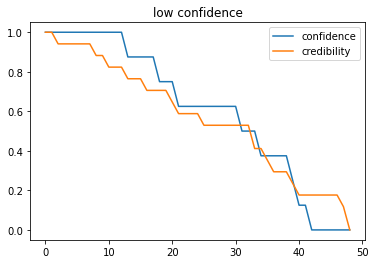

In [165]:
util.plot_conf_cred(df[df.confidence < 0.95].sort_values(by=['confidence','credibility']), title='low confidence')
df[df.confidence < 0.95].sort_values(by=['confidence','credibility']).head()
# df[df.confidence < 0.95].sort_values(by=['confidence','credibility'])

,confidence,credibility,verdict,empty,single,single_correct,multiple,data,mondrian,classifier,conformal_predictor,nonconformity,method,model,instance_of_model,df
0,0.984347,0.497817,0.9325,0.005,0.995,0.9325,0.0,signal_with_header_for_orange,False,logistic regression,InductiveClassifier (InverseProbability (logis...,InverseProbability (logistic regression),,LogisticRegressionClassifier(skl_model=Logisti...,InductiveClassifier (InverseProbability (logis...,classes confidence credibility eps \ 0...
1,0.984347,0.497817,0.9325,0.005,0.995,0.9325,0.0,signal_with_header_for_orange,False,logistic regression,InductiveClassifier (InverseProbability (logis...,InverseProbability (logistic regression),,LogisticRegressionClassifier(skl_model=Logisti...,InductiveClassifier (InverseProbability (logis...,classes confidence credibility eps \ 0...
2,0.984347,0.497817,0.9325,0.005,0.995,0.9325,0.0,signal_with_header_for_orange,False,logistic regression,InductiveClassifier (InverseProbability (logis...,InverseProbability (logistic regression),,LogisticRegressionClassifier(skl_model=Logisti...,InductiveClassifier (InverseProbability (logis...,classes confidence credibility eps \ 0...


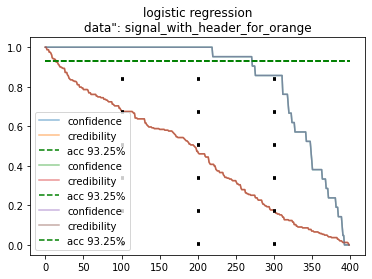

In [128]:
np.random.seed(42)


train, test = next(cp.evaluation.RandomSampler(tab_signal,2,1))
train, calibrate = next(cp.evaluation.RandomSampler(train,2,1))

cc=cp.classification.InductiveClassifier(cp.nonconformity.InverseProbability(Orange.classification.LogisticRegressionLearner()))
tt = run_experiments(cc, train, test, calibrate, times=3)

plot_experiments(tt)
tt

Notice LR doesn't change, but RF below does

,confidence,credibility,verdict,empty,single,single_correct,multiple,data,mondrian,classifier,conformal_predictor,nonconformity,method,model,instance_of_model,df
0,0.966604,0.633946,0.93,0.0,0.9725,0.9025,0.0275,signal_with_header_for_orange,False,random forest,InductiveClassifier (InverseProbability (rando...,InverseProbability (random forest),,RandomForestClassifier(skl_model=RandomForestC...,InductiveClassifier (InverseProbability (rando...,classes confidence credibility eps \ 0...
1,0.959636,0.677509,0.915,0.0,0.9725,0.8875,0.0275,signal_with_header_for_orange,False,random forest,InductiveClassifier (InverseProbability (rando...,InverseProbability (random forest),,RandomForestClassifier(skl_model=RandomForestC...,InductiveClassifier (InverseProbability (rando...,classes confidence credibility eps \ 0...
2,0.96472,0.662351,0.9475,0.0,0.895,0.8425,0.105,signal_with_header_for_orange,False,random forest,InductiveClassifier (InverseProbability (rando...,InverseProbability (random forest),,RandomForestClassifier(skl_model=RandomForestC...,InductiveClassifier (InverseProbability (rando...,classes confidence credibility eps \ 0...


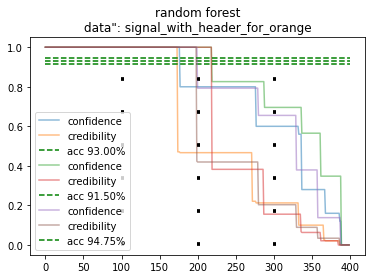

In [127]:
np.random.seed(42)


train, test = next(cp.evaluation.RandomSampler(tab_signal,2,1))
train, calibrate = next(cp.evaluation.RandomSampler(train,2,1))

cc=cp.classification.InductiveClassifier(cp.nonconformity.InverseProbability(Orange.classification.RandomForestLearner()))
tt = run_experiments(cc, train, test, calibrate, times=3)

plot_experiments(tt)
tt

,confidence,credibility,verdict,empty,single,single_correct,multiple,data,mondrian,classifier,conformal_predictor,nonconformity,method,model,instance_of_model,df
0,0.974312,0.714187,0.9,0.0,0.991667,0.891667,0.008333,signal_with_header_for_orange,False,random forest,InductiveClassifier (InverseProbability (rando...,InverseProbability (random forest),,RandomForestClassifier(skl_model=RandomForestC...,InductiveClassifier (InverseProbability (rando...,classes confidence credibility eps \ 0...
1,0.975701,0.663383,0.879167,0.008333,0.991667,0.879167,0.0,signal_with_header_for_orange,False,random forest,InductiveClassifier (InverseProbability (rando...,InverseProbability (random forest),,RandomForestClassifier(skl_model=RandomForestC...,InductiveClassifier (InverseProbability (rando...,classes confidence credibility eps \ 0...
2,0.96751,0.68837,0.895833,0.0,0.995833,0.891667,0.004167,signal_with_header_for_orange,False,random forest,InductiveClassifier (InverseProbability (rando...,InverseProbability (random forest),,RandomForestClassifier(skl_model=RandomForestC...,InductiveClassifier (InverseProbability (rando...,classes confidence credibility eps \ 0...


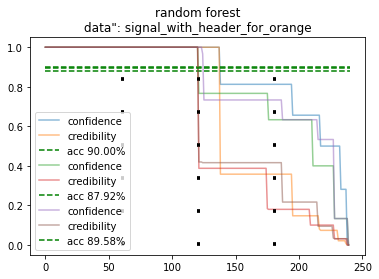

In [130]:
np.random.seed(42)


# train, test = next(cp.evaluation.RandomSampler(tab_signal,2,1))
train, test = next(cp.evaluation.CrossSampler(tab_signal,5))
train, calibrate = next(cp.evaluation.RandomSampler(train,2,1))

# cc=cp.classification.InductiveClassifier(cp.nonconformity.InverseProbability(Orange.classification.LogisticRegressionLearner()))
cc=cp.classification.InductiveClassifier(cp.nonconformity.InverseProbability(Orange.classification.RandomForestLearner()))
tt = run_experiments(cc, train, test, calibrate, times=3)

plot_experiments(tt)
tt

,confidence,credibility,verdict,empty,single,single_correct,multiple,data,mondrian,classifier,conformal_predictor,nonconformity,method,model,instance_of_model,df
0,0.968675,0.652124,0.9,0.025,0.975,0.9,0.0,signal_with_header_for_orange,False,random forest,InductiveClassifier (InverseProbability (rando...,InverseProbability (random forest),,RandomForestClassifier(skl_model=RandomForestC...,InductiveClassifier (InverseProbability (rando...,classes confidence credibility eps \ 0...
1,0.979132,0.727078,0.925,0.0,1.0,0.925,0.0,signal_with_header_for_orange,False,random forest,InductiveClassifier (InverseProbability (rando...,InverseProbability (random forest),,RandomForestClassifier(skl_model=RandomForestC...,InductiveClassifier (InverseProbability (rando...,classes confidence credibility eps \ 0...
2,0.969321,0.766528,0.9,0.0,1.0,0.9,0.0,signal_with_header_for_orange,False,random forest,InductiveClassifier (InverseProbability (rando...,InverseProbability (random forest),,RandomForestClassifier(skl_model=RandomForestC...,InductiveClassifier (InverseProbability (rando...,classes confidence credibility eps \ 0...


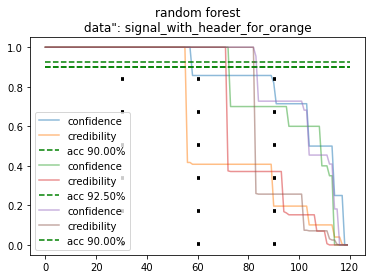

In [131]:
np.random.seed(42)


# train, test = next(cp.evaluation.RandomSampler(tab_signal,2,1))
train, test = next(cp.evaluation.CrossSampler(tab_signal,10))
train, calibrate = next(cp.evaluation.RandomSampler(train,2,1))

# cc=cp.classification.InductiveClassifier(cp.nonconformity.InverseProbability(Orange.classification.LogisticRegressionLearner()))
cc=cp.classification.InductiveClassifier(cp.nonconformity.InverseProbability(Orange.classification.RandomForestLearner()))
tt = run_experiments(cc, train, test, calibrate, times=3)

plot_experiments(tt)
tt

----

In [132]:
tt.loc[0].df.Race.value_counts()

0    64
1    24
2    22
3     8
4     2
Name: Race, dtype: int64

Ugh, above wasn't just one change--from LR to RF, but also RandomSampler to CrossSampler

Do RF with RandomSampler

In [62]:
np.random.seed(42)


train, test = next(cp.evaluation.RandomSampler(tab_signal,2,1))
train, calibrate = next(cp.evaluation.RandomSampler(tab_signal,2,1))

cc=cp.classification.InductiveClassifier(cp.nonconformity.InverseProbability(Orange.classification.RandomForestLearner()))
tt = run_experiments(cc, train, test, calibrate, times=3)

In [63]:
tt

,confidence,credibility,verdict,empty,single,single_correct,multiple,data,mondrian,classifier,conformal_predictor,nonconformity,method,model,instance_of_model,df
0,0.979059,0.758186,0.0,0.0075,0.9925,0.0,0.0,signal_with_header_for_orange,False,random forest,InductiveClassifier (InverseProbability (rando...,InverseProbability (random forest),,RandomForestClassifier(skl_model=RandomForestC...,InductiveClassifier (InverseProbability (rando...,classes confidence credibility eps \ 0...
1,0.973504,0.772668,0.0,0.0075,0.9925,0.0,0.0,signal_with_header_for_orange,False,random forest,InductiveClassifier (InverseProbability (rando...,InverseProbability (random forest),,RandomForestClassifier(skl_model=RandomForestC...,InductiveClassifier (InverseProbability (rando...,classes confidence credibility eps \ 0...
2,0.975966,0.772637,0.0,0.0025,0.9975,0.0,0.0,signal_with_header_for_orange,False,random forest,InductiveClassifier (InverseProbability (rando...,InverseProbability (random forest),,RandomForestClassifier(skl_model=RandomForestC...,InductiveClassifier (InverseProbability (rando...,classes confidence credibility eps \ 0...


----

,confidence,credibility,verdict,empty,single,single_correct,multiple,data,mondrian,classifier,conformal_predictor,nonconformity,method,model,instance_of_model,df
0,0.979059,0.758186,0.0,0.0075,0.9925,0.0,0.0,signal_with_header_for_orange,False,random forest,InductiveClassifier (InverseProbability (rando...,InverseProbability (random forest),,RandomForestClassifier(skl_model=RandomForestC...,InductiveClassifier (InverseProbability (rando...,classes confidence credibility eps \ 0...
1,0.973504,0.772668,0.0,0.0075,0.9925,0.0,0.0,signal_with_header_for_orange,False,random forest,InductiveClassifier (InverseProbability (rando...,InverseProbability (random forest),,RandomForestClassifier(skl_model=RandomForestC...,InductiveClassifier (InverseProbability (rando...,classes confidence credibility eps \ 0...
2,0.975966,0.772637,0.0,0.0025,0.9975,0.0,0.0,signal_with_header_for_orange,False,random forest,InductiveClassifier (InverseProbability (rando...,InverseProbability (random forest),,RandomForestClassifier(skl_model=RandomForestC...,InductiveClassifier (InverseProbability (rando...,classes confidence credibility eps \ 0...


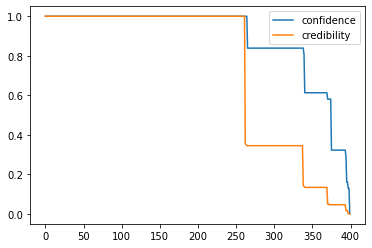

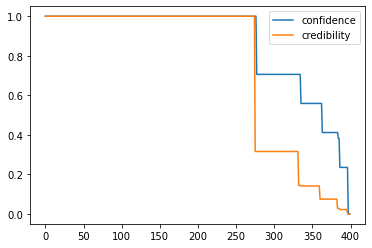

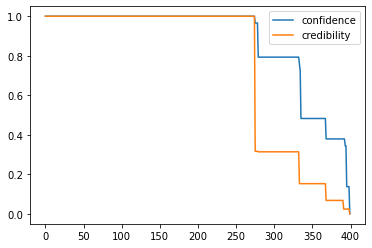

In [64]:
util.plot_conf_cred(tt.loc[0].df)
util.plot_conf_cred(tt.loc[1].df)
util.plot_conf_cred(tt.loc[2].df)
tt

In [65]:
tt.loc[0].df.Race.value_counts()

0    216
2     87
1     64
3     24
4      5
5      3
6      1
Name: Race, dtype: int64

Ugh, train/test/cal are overlapping...

Redo, but take train/cal from train, not population

In [66]:
np.random.seed(42)


train, test = next(cp.evaluation.RandomSampler(tab_signal,2,1))
train, calibrate = next(cp.evaluation.RandomSampler(train,2,1))

cc=cp.classification.InductiveClassifier(cp.nonconformity.InverseProbability(Orange.classification.RandomForestLearner()))
tt = run_experiments(cc, train, test, calibrate, times=3)

In [67]:
tt

,confidence,credibility,verdict,empty,single,single_correct,multiple,data,mondrian,classifier,conformal_predictor,nonconformity,method,model,instance_of_model,df
0,0.966604,0.633946,0.0,0.0,0.9725,0.0,0.0275,signal_with_header_for_orange,False,random forest,InductiveClassifier (InverseProbability (rando...,InverseProbability (random forest),,RandomForestClassifier(skl_model=RandomForestC...,InductiveClassifier (InverseProbability (rando...,classes confidence credibility eps \ 0...
1,0.959636,0.677509,0.0,0.0,0.9725,0.0,0.0275,signal_with_header_for_orange,False,random forest,InductiveClassifier (InverseProbability (rando...,InverseProbability (random forest),,RandomForestClassifier(skl_model=RandomForestC...,InductiveClassifier (InverseProbability (rando...,classes confidence credibility eps \ 0...
2,0.96472,0.662351,0.0,0.0,0.895,0.0,0.105,signal_with_header_for_orange,False,random forest,InductiveClassifier (InverseProbability (rando...,InverseProbability (random forest),,RandomForestClassifier(skl_model=RandomForestC...,InductiveClassifier (InverseProbability (rando...,classes confidence credibility eps \ 0...


----

,confidence,credibility,verdict,empty,single,single_correct,multiple,data,mondrian,classifier,conformal_predictor,nonconformity,method,model,instance_of_model,df
0,0.966604,0.633946,0.0,0.0,0.9725,0.0,0.0275,signal_with_header_for_orange,False,random forest,InductiveClassifier (InverseProbability (rando...,InverseProbability (random forest),,RandomForestClassifier(skl_model=RandomForestC...,InductiveClassifier (InverseProbability (rando...,classes confidence credibility eps \ 0...
1,0.959636,0.677509,0.0,0.0,0.9725,0.0,0.0275,signal_with_header_for_orange,False,random forest,InductiveClassifier (InverseProbability (rando...,InverseProbability (random forest),,RandomForestClassifier(skl_model=RandomForestC...,InductiveClassifier (InverseProbability (rando...,classes confidence credibility eps \ 0...
2,0.96472,0.662351,0.0,0.0,0.895,0.0,0.105,signal_with_header_for_orange,False,random forest,InductiveClassifier (InverseProbability (rando...,InverseProbability (random forest),,RandomForestClassifier(skl_model=RandomForestC...,InductiveClassifier (InverseProbability (rando...,classes confidence credibility eps \ 0...


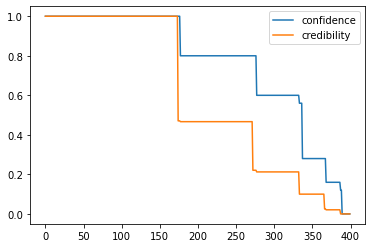

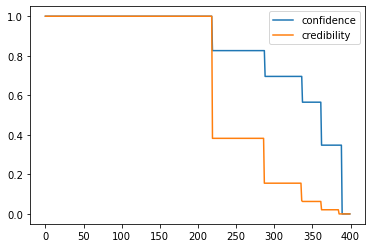

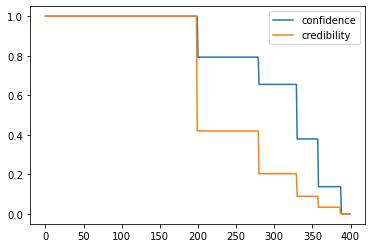

In [68]:
util.plot_conf_cred(tt.loc[0].df)
util.plot_conf_cred(tt.loc[1].df)
util.plot_conf_cred(tt.loc[2].df)
tt

In [69]:
tt.loc[0].df.Race.value_counts()

0    216
2     87
1     64
3     24
4      5
5      3
6      1
Name: Race, dtype: int64

# 10x Experiment Conclusion

----

__LogReg__ (Inductive) is conf, __few empty__, many singleton, __more multiple__

__ADA__ is conf, __more empty__, __most__ singleton, __0 multiple__, cost of __lowest__ (not by much) accuracy (prediction contains class)

__RF__ is conf, less empty, many singletons, __less multiple__

- RF-__100__/ SRF-__100__ exchange __less empty__ for __more multiple__

KNN __least__ conf, __0__ empty, __least__ singleton, __most__ multiple

-----

-----